# Deep Learning Lesson 4: MNIST Classification Version 4 


In this lesson we discuss in how to create a simple IPython Notebook to solve
an image classification problem. MNIST contains a set of pictures


In [0]:
! python3 --version

In [0]:
! pip install tensorflow-gpu==1.14.0

     |████████████████████████████████| 377.0MB 36kB/s 


## Import Libraries 

In [0]:

import time 

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

## Pre-process data

### Load data 

First we load the data from the inbuilt mnist dataset from Keras

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Identify Number of Classes

As this is a number classification problem. We need to know how many classes are there. 
So we'll count the number of unique labels. 

In [0]:
num_labels = len(np.unique(y_train))

5

### Convert Labels To One-Hot Vector

**|Exercise:** Understand what is an one-hot vector? 

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Image Reshaping

The training model is designed by considering the data as a vector.
This is a model dependent modification. Here we assume the image is
a squared shape image.

In [0]:
image_size = x_train.shape[1]
input_size = image_size * image_size

## Resize and Normalize

The next step is to continue the reshaping to a fit into a vector
and normalize the data. Image values are from 0 - 255, so an 
easy way to normalize is to divide by the maximum value. 

**|Execrcise: Suggest another way to normalize the data preserving the accuracy or improving the accuracy.**

In [0]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

## Create a Keras Model

Keras is a neural network library. Most important thing with Keras is the way we design the neural network. 

In this model we have a couple of ideas to understand. 

In deep learnning models one of the main issues faced is model **overfitting** and **gradient vanishing**. 
These issues are well addressed by a concept called **dropout**. 

**|Exercise: Find out what is model overfitting, gradient vanishing and read some articles on dropout.**

A simple model can be initiated by using an **Sequential** instance in Keras. 
For this instance we add a few layers. 

1. Dense Layer 
2. Activation Layer (Relu is the activation function)
3. Dropout Layer
4. Denise Layer
5. Activation Layer (Relu is the activation function)
6. Dropout Layer
7. Dense Layer
8. Activation Layer (Softmax is the activation function)

Dense layer and the layer followed by it is fully connected. 
For instance the number of hidden units used here is 128
and the following layer is a dense layer followed by an activation 
layer and dropout layer. If the dropout layer was not there, all these
128 units in the first dense layer and the 128 units in the next dense 
layer will be connected. You will know why this happens, 
when you find answers to the exercise questions. 

**Execrcise: Find out what is the use of an activation function. Discuss how relu and softmax are different. 
Find out why, softmax was used as the last layer.**

The summary function provides tabular summary on the model you created. 
And the plot_model function provides a grpah on the network you created. 





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_

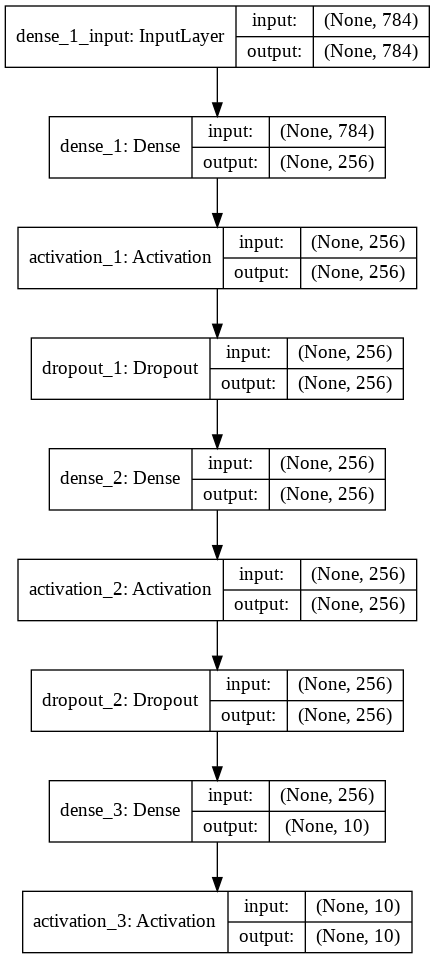

In [0]:
# Create Model
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

## Compile and Train

A keras model need to be compiled before it can be used to train
the model. In the compile function, you can provide the optimization
that you want to add, metrics you expect and the type of loss function
you need to use. 

Here we use adam optimizer, a famous optimizer used in neural networks. 

**Exercise: Find 3 other optimizers used on neural networks.**

The loss funtion we have used is the categorical_crossentropy. 

**Exercise: Find other loss functions provided in keras. Your answer can limit to 1 or more.**

Once the model is compiled, then the fit function is called upon passing the number of epochs,
traing data and batch size. 

The batch size determines the number of elements used per minibatch in optimizing the function. 

**Note: Change the number of epochs, batch size and see what happens.**

**Exercise: Figure out a way to plot the loss function value. You can use any method you like.** 


In [0]:
# Compile and Train

# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=100, batch_size=batch_size)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
60000/60000 [==============================] - 5s 89us/step - loss: 0.4224 - acc: 0.8684
Epoch 2/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.1952 - acc: 0.9421
Epoch 3/100
27648/60000 [============>.................] - ETA: 2s - loss: 0.1566 - acc: 0.9527

## Testing 

Now we can test the trained model. Use the evaluate function by passing
test data and batch size and the accuracy and the loss value can be retrieved.

**Exercise: Try to optimize the network by changing the number of epochs, batch size and record the best accuracy that you can gain**

In [0]:
# Testing 

# validate the model on test dataset to determine generalization
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 0s 28us/step

Test accuracy: 98.4%


## Final Note

Objective of this exercise is not to teach you the depths of deep learning. 
But to teach you basic concepts that may need to design a simple network to 
solve a problem. Before running the whole code, read all the instructions 
before a code section. Solve all the problems noted in bold text with Exercise keyword.
Write your answers and submit a PDF by following the **Assignment 4**.
Include codes or observations you made on those sections. 


### Reference: 

[Orignal Source to Source Code](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras)
